In [ ]:
%pip install numpy
%pip install pandas
%pip install ipympl
#%pip install pyqt6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt
from numpy.typing import ArrayLike
from typing import List, Set, Dict, Tuple


In [2]:
%matplotlib widget

In [3]:
# Tupel of (Channel No., r1 mass, r1 charge, r2 mass, r2 charge)
reactionChannelsMQ = [
    (1, 1, 1, 1, 1),
    (2, 2, 2, 1, 1),
]

def defineMassAndCharge(df: pd.DataFrame, values: list[tuple[int, float, float, float, float]]) -> None:
    for channel, r1m, r1q, r2m, r2q in values:
        df["r1m"] += r1m * (channel==df["reaction"])
        df["r1q"] += r1q * (channel==df["reaction"])
        df["r2m"] += r2m * (channel==df["reaction"])
        df["r2q"] += r2q * (channel==df["reaction"])

In [4]:
def calcPZ(tof: ArrayLike, q: float, m: float, lengthAcc: float, lengthTotal: float, specEz: float):
    if specEz > 0:
        print("\033[93mIt seems like the electrons are deaccellerated by the electric field. Check orientation!\033[0m")
    
    if lengthAcc == lengthTotal or lengthAcc is None:
        return lengthTotal * m / tof - 0.5 * specEz * q * tof
    
    a = specEz
    q = q
    t = np.zeros(len(tof), dtype=np.cdouble)
    t += tof
    s_B= lengthAcc
    s = lengthTotal
    m = m
    i = 1j
    
    v = (-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + np.sqrt((-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**2 + 4*(24*a*q*t**2*s_B - (a*q*t**2 - 2*s)**2)**3) + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**(1./3.)/(6*2**(1./3.)*t) - (24*a*q*t**2*s_B - (a*q*t**2 - 2*s)**2)/(3*2**(2./3.)*t*(-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + np.sqrt((-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**2 + 4*(24*a*q*t**2*s_B - (a*q*t**2 - 2*s)**2)**3) + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**(1./3.)) - (a*q*t**2 - 2*s)/(6*t)
    #v2 = -((1 - i*np.sqrt(3))*(-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + np.sqrt((-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**2 + 4*(24*a*q*t**2*s_B - (a*q*t**2 - 2*s)**2)**3) + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**(1./3.))/(12*2**(1./3.)*t) + ((1 + i*np.sqrt(3))*(24*a*q*t**2*s_B - (a*q*t**2 - 2*s)**2))/(6*2**(2./3.)*t*(-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + np.sqrt((-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**2 + 4*(24*a*q*t**2*s_B - (a*q*t**2 - 2*s)**2)**3) + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**(1./3.)) - (a*q*t**2 - 2*s)/(6*t)
    #v3 = -((1 + i*np.sqrt(3))*(-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + np.sqrt((-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**2 + 4*(24*a*q*t**2*s_B - (a*q*t**2 - 2*s)**2)**3) + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**(1./3.))/(12*2**(1./3.)*t) + ((1 - i*np.sqrt(3))*(24*a*q*t**2*s_B - (a*q*t**2 - 2*s)**2))/(6*2**(2./3.)*t*(-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + np.sqrt((-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**2 + 4*(24*a*q*t**2*s_B - (a*q*t**2 - 2*s)**2)**3) + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**(1./3.)) - (a*q*t**2 - 2*s)/(6*t)
    #print("v1",len(v), np.sum(np.abs(np.imag(v)/np.real(v))>1e-10), v[np.abs(np.imag(v)/np.real(v))>1e-10])
    #print("v2",len(v), np.sum(np.imag(v2)!=0), v[np.imag(v2)!=0])
    #print("v3",len(v), np.sum(np.imag(v3)!=0), v[np.imag(v3)!=0])
    vReal = np.real(v)
    vReal[np.imag(v)!=0] = None
    print(np.sum(np.imag(v)!=0))
    return m*vReal

In [5]:
def calcMomElec(df: pd.DataFrame, specLength: float, specEz: float, gyrationPeriode: float, specAcc: float=None, \
                shift: Tuple[float, float, float]=(0,0,0), stretch: Tuple[float, float, float]=(1,1,1),\
                rotate: float=0, shiftThenRotate: bool=True, mirrorX: bool=False, mirrorY: bool=False,\
                momShift: Tuple[float, float, float]=(0,0,0), momStretch: Tuple[float, float, float, float]=(1.,1.,1.,1.),\
                momMirrorX: bool=False, momMirrorY: bool=False) -> None:
    """Calculate the momenta of the first electron in the data frame.

    Keyword arguments:
    specLength -- the length of the spectrometer in mm
    specEz     -- the z-component of the electric field in V/cm
    gyrationPeriode -- gyration periode of the electron in ns
    shift      -- Shift the detector an TOF, tuple: (x-shift in mm, y-shift in mm, t-shift in ns)
    stretch    -- streches the detector in x and y, tuple: (x-stretch, y-stretch, x-y-stretch)
    rotate     -- rotate the detector counterclockwise in deg
    mirrorX    -- mirrors the momentum in x if True (applied before roation)
    mirrorY    -- mirrors the momentum in y if True (applied before roation)
    shiftThenRotate -- order of shifts and stretches, shifts firs if True
    momShift   -- shifts the momentum, tuple: (px-shift, py-shift, pz-shift)
    momStretch -- stretches themomentum, tuple: (px-stretch, py-stretch, pz-stretch, total)
    momMirrorX    -- mirrors the momentum in x if True
    momMirrorY    -- mirrors the momentum in y if True
    """
    
    specLength      /= length_mm_SI
    if specAcc is not None:
        specAcc         /= length_mm_SI
    specEz          /= eField_Vcm_SI
    gyrationPeriode /= time_ns_SI
    q = -1.
    m = 1.
    omega = 2*np.pi/gyrationPeriode
    x  = np.array(df["e1xAU"])
    y  = np.array(df["e1yAU"])
    tof= np.array(df["e1tofAU"])
    rotate = np.deg2rad(rotate)

    # Mirror detector
    if mirrorX:
        x *= -1
    if mirrorY:
        y *= -1

    # Shift and rotate detector
    if shiftThenRotate:
        x   += shift[0]/length_mm_SI
        y   += shift[1]/length_mm_SI
        tof += shift[2]/time_ns_SI
        x, y = x*np.cos(rotate)-y*np.sin(rotate), x*np.sin(rotate)+y*np.cos(rotate)
    else:
        x, y = x*np.cos(rotate)-y*np.sin(rotate), x*np.sin(rotate)+y*np.cos(rotate)
        x   += shift[0]/length_mm_SI
        y   += shift[1]/length_mm_SI
        tof += shift[2]/time_ns_SI

    # Stretch detector
    x *= stretch[0] * stretch[2]
    y *= stretch[1] * stretch[2]


    # Calculate momentum
    #px = omega * 0.5 * ( x / np.tan(omega * tof * 0.5) - y)
    a = (1. - np.cos(omega*tof)) / omega
    b = np.sin(omega*tof) / omega
    px= m * (x*b - y*a) / (a**2 + b**2)
    #px = m*omega / (2-2*np.cos(omega*tof)) * (np.sin(omega*tof)*x + (np.cos(omega*tof)-1)*y)
    
    py = omega * 0.5 * ( y / np.tan(omega * tof * 0.5) + x)
    py= m * (x*a + y*b)/ (a**2 + b**2)
    #py = m*omega / (2-2*np.cos(omega*tof)) * ((1-np.cos(omega*tof))*x + np.sin(omega*tof)*y)
    
    pz = calcPZ(tof, q, m, specAcc, specLength, specEz)

    # Mirror momentum
    if momMirrorX:
        px *= -1
    if momMirrorY:
        py *= -1

    # Shift momentum
    px   += momShift[0]
    py   += momShift[1]
    pz   += momShift[2]

    # Stretch momentum
    px *= momStretch[0] * momStretch[3]
    py *= momStretch[1] * momStretch[3]
    pz *= momStretch[2] * momStretch[3]

    df["e1px"] = px
    df["e1py"] = py
    df["e1pz"] = pz
    p = np.sqrt(px**2 + py**2 + pz**2)
    df["e1p"] = np.sqrt(px**2 + py**2 + pz**2)
    df["tofShiftAU"] = tof

    df["e1phi"]      = np.arctan2(py, px)
    df["e1phiDeg"]   = np.arctan2(py, px)*180./np.pi
    df["e1cosTheta"] = pz / p
    df["e1energy"]   = p**2 / (2*m)
    df["e1energyEV"] =(p**2 / (2*m)) * energy_eV_SI

    return df

In [6]:
length_mm_SI  = 5.291_772_109_03e-8
eField_Vcm_SI = 5.142_206_747_63e9
time_ns_SI    = 2.418_884_326_585_7e-8
bField_Gauss_to_ns = lambda x: 1e9*(2*np.pi*9.1093837e-31)/(1.60217733e-19*x*1e-4)
energy_eV_SI  = 27.211_386_245_988

In [7]:
df = pd.read_csv(r"D:\ELCH-Programm\dataCOfull.zip")
df["r1m"] = 0
df["r1q"] = 0
df["r2m"] = 0
df["r2q"] = 0
df["r1px"] = 0
df["r1py"] = 0
df["r1pz"] = 0
df["r1p"] = 0
df["r2px"] = 0
df["r2py"] = 0
df["r2pz"] = 0
df["r2p"] = 0
df["e1px"] = 0
df["e1py"] = 0
df["e1pz"] = 0
df["e1p"] = 0
df["r1omega"] = 0
df["r2omega"] = 0
df["tofShiftAU"] = 0
df["e1phi"] = 0
df["e1phiDeg"] = 0
df["e1cosTheta"] = 0
df["e1energy"] = 0
df["e1energyEV"] = 0
df["e1xAU"] = df["e1x"]/length_mm_SI
df["e1yAU"] = df["e1y"]/length_mm_SI
df["e1tofAU"] = df["e1tof"]/time_ns_SI
df["e1mcpAU"] = df["e1mcp"]/time_ns_SI
defineMassAndCharge(df, reactionChannelsMQ)
print(df.keys())
df

Index(['Unnamed: 0', 'reaction', 'ehit', 'rhit', 'bunchmarker', 'timestamp',
       'LMFStart', 'LMFStop', 'r1x', 'r1y', 'r1mcp', 'r1tof', 'r1flag', 'r2x',
       'r2y', 'r2mcp', 'r2tof', 'r2flag', 'e1x', 'e1y', 'e1mcp', 'e1tof',
       'e1flag', 'r1m', 'r1q', 'r2m', 'r2q', 'r1px', 'r1py', 'r1pz', 'r1p',
       'r2px', 'r2py', 'r2pz', 'r2p', 'e1px', 'e1py', 'e1pz', 'e1p', 'r1omega',
       'r2omega', 'tofShiftAU', 'e1phi', 'e1phiDeg', 'e1cosTheta', 'e1energy',
       'e1energyEV', 'e1xAU', 'e1yAU', 'e1tofAU', 'e1mcpAU'],
      dtype='object')


,Unnamed: 0,reaction,ehit,rhit,bunchmarker,timestamp,LMFStart,LMFStop,r1x,r1y,...,tofShiftAU,e1phi,e1phiDeg,e1cosTheta,e1energy,e1energyEV,e1xAU,e1yAU,e1tofAU,e1mcpAU
0,0,2.0,1.0,2.0,0.0,0.000174,1.572403e+09,1.572403e+09,-18.705824,7.430418,...,0,0,0,0,0,0,6.483995e+07,6.946152e+08,9.054752e+08,-1.323527e+11
1,1,2.0,1.0,2.0,0.0,0.000298,1.572403e+09,1.572403e+09,13.545695,4.293942,...,0,0,0,0,0,0,4.528949e+08,-2.082329e+08,9.826484e+08,-1.332799e+11
2,2,2.0,1.0,2.0,0.0,0.000438,1.572403e+09,1.572403e+09,-19.262768,7.634078,...,0,0,0,0,0,0,-1.810643e+08,6.626362e+08,9.290752e+08,-1.408302e+11
3,3,2.0,1.0,2.0,0.0,0.001090,1.572403e+09,1.572403e+09,13.219470,8.653421,...,0,0,0,0,0,0,-4.300099e+08,4.577785e+08,9.474266e+08,-1.291998e+11
4,4,2.0,1.0,2.0,0.0,0.002430,1.572403e+09,1.572403e+09,-13.445681,6.268726,...,0,0,0,0,0,0,4.192316e+08,-3.852280e+08,9.862164e+08,-1.329411e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6034387,14387,2.0,1.0,2.0,0.0,3809.715233,1.572407e+09,1.572407e+09,15.950505,-9.066811,...,0,0,0,0,0,0,4.818866e+08,2.819962e+08,9.735675e+08,-1.275462e+11
6034388,14388,2.0,1.0,2.0,0.0,3809.715323,1.572407e+09,1.572407e+09,-7.879688,19.314465,...,0,0,0,0,0,0,-7.918880e+07,-6.067368e+08,9.543292e+08,-1.417561e+11
6034389,14389,2.0,1.0,2.0,0.0,3809.715379,1.572407e+09,1.572407e+09,-27.604519,-27.202664,...,0,0,0,0,0,0,1.908340e+08,-6.451942e+08,8.483938e+08,-3.011669e+10
6034390,14390,2.0,1.0,2.0,0.0,3809.715879,1.572407e+09,1.572407e+09,20.199630,-21.251082,...,0,0,0,0,0,0,1.210235e+08,6.918373e+05,9.425857e+08,-1.344529e+11


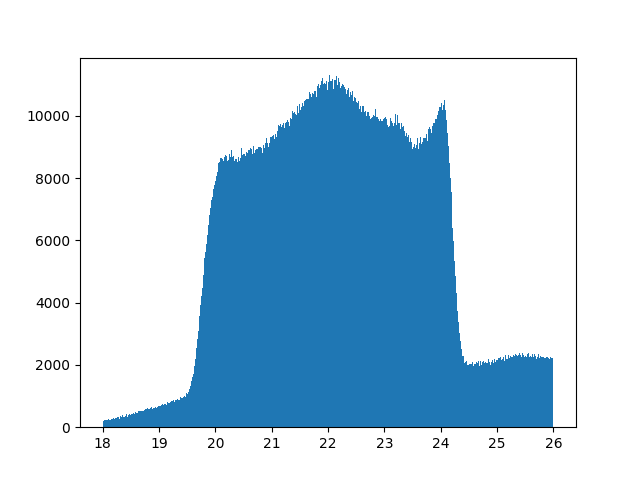

In [8]:
plt.clf()
plt.hist(df["e1tof"], bins=1000);

In [9]:
plt.clf()
plt.hist2d(df["e1x"], df["e1y"], bins=200);

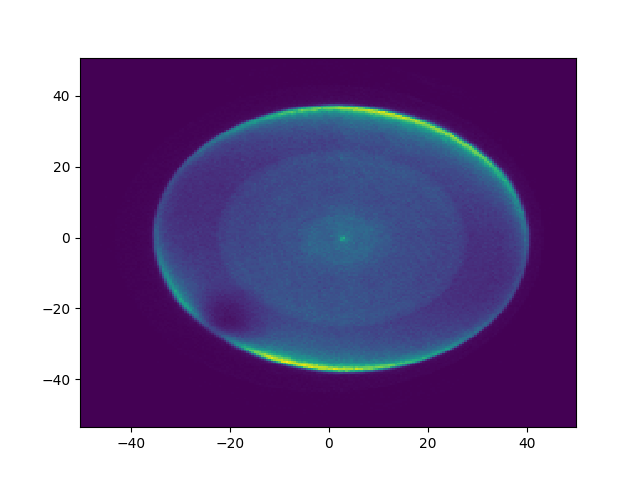

In [10]:
plt.show()

In [ ]:
#fig, ((axA1, axA2, axA3), (axB1, axB2, axB3)) = plt.subplots(2,3)

In [11]:
pxMax = 2
pyMax = 2
pzMax = 2

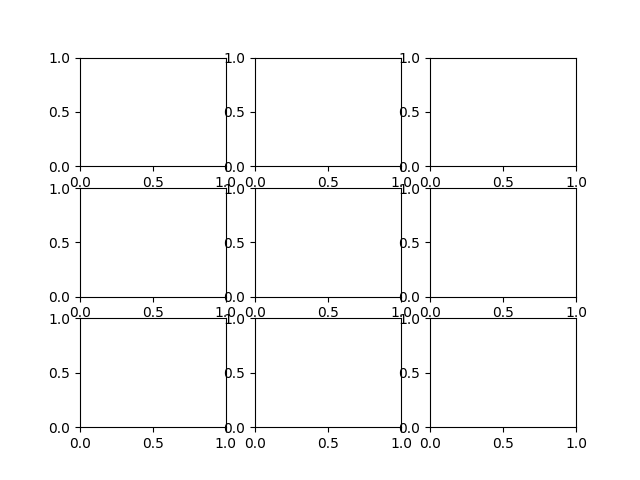

In [12]:
fig, ((axA1, axA2, axA3), (axB1, axB2, axB3), (axC1, axC2, axC3)) = plt.subplots(3,3)
plt.show()

In [13]:
#SF6 Datan (dataC.zip)
#df2 = calcMomElec(df, specLength=120., specEz=-42.78, gyrationPeriode=28., specAcc=40., shift=(0.46,-0.6,-0.5), stretch=(0.9670,0.9660,1.), rotate=60, shiftThenRotate=True, momMirrorY=True)

#CO Daten (dataCO.zip)
print(bField_Gauss_to_ns(6.0),"ns")
df2 = calcMomElec(df, specLength=117.+57., specAcc=57., specEz=-57.4, gyrationPeriode=bField_Gauss_to_ns(6.0), shift=(-0.96,1.84,-0.5), stretch=(1.,1.,1.29), rotate=60, shiftThenRotate=False)
df = None
df = df2


axA1.clear()
axA1.hist(df["e1tof"], bins=300);
axA1.hist(df["tofShiftAU"]*time_ns_SI, bins=300);
axA1.set_xlabel("TOF / ns")

axA2.clear()
axA2.hist2d(df["e1x"], df["e1y"], bins=200, cmin=2);
axA2.set_xlabel("$x_{e}$ / mm")
axA2.set_ylabel("$y_{e}$ / mm")

axA3.clear()
#axA3.hist(df["reaction"], bins=20, range=(0.5,20.5));
#axA3.set_xlabel("reaction Channel")
axA3.hist2d(df["e1tof"], df["e1y"], bins=(300,200))
axA3.set_xlabel("TOF / ns")
axA3.set_ylabel("$y_{e}$ / mm")

axB1.clear()
axB1.hist2d(df["e1px"], df["e1py"], bins=200, cmin=1, range=((-pxMax, pxMax),(-pyMax, pyMax)),norm=mlt.colors.LogNorm());
axB1.set_xlabel("$p_x$ / a.u.")
axB1.set_ylabel("$p_y$ / a.u.")

axB2.clear()
axB2.hist2d(df["e1px"], df["e1pz"], bins=200, cmin=1, range=((-pxMax, pxMax),(-pzMax, pzMax)),norm=mlt.colors.LogNorm());
axB2.set_xlabel("$p_x$ / a.u.")
axB2.set_ylabel("$p_z$ / a.u.")

axB3.clear()
axB3.hist2d(df["e1py"], df["e1pz"], bins=200, cmin=1, range=((-pyMax, pyMax),(-pzMax, pzMax)),norm=mlt.colors.LogNorm());
axB3.set_xlabel("$p_y$ / a.u.")
axB3.set_ylabel("$p_z$ / a.u.")

axC1.clear()
axC1.hist(df["e1energyEV"], bins=200)
axC1.set_xlabel("energy / eV")

axC2.clear()
axC2.hist2d(df["e1phiDeg"], df["e1energyEV"], bins=[180, 200])
axC2.set_xlabel("$\\phi$ / deg")
axC2.set_ylabel("energy / eV")

axC3.clear()
axC3.hist2d(df["e1cosTheta"], df["e1energyEV"], bins=[180, 200])
axC3.set_xlabel("$\\cos(\\theta)$")
axC3.set_ylabel("energy / eV")


plt.tight_layout()

59.539753340226106 ns
0


3417


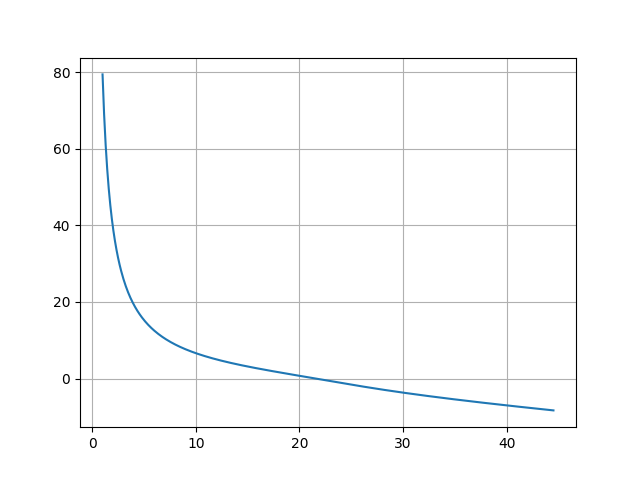

In [14]:
a = np.linspace(1, 300, num=4000)
b = calcPZ(a/time_ns_SI, -1, 1, (57.)/length_mm_SI, (117.+57.)/length_mm_SI, -57.4/eField_Vcm_SI)

fig, ax = plt.subplots(1, 1)
ax.plot(a,b)
plt.grid("both")
plt.show()

In [15]:
plt.close()

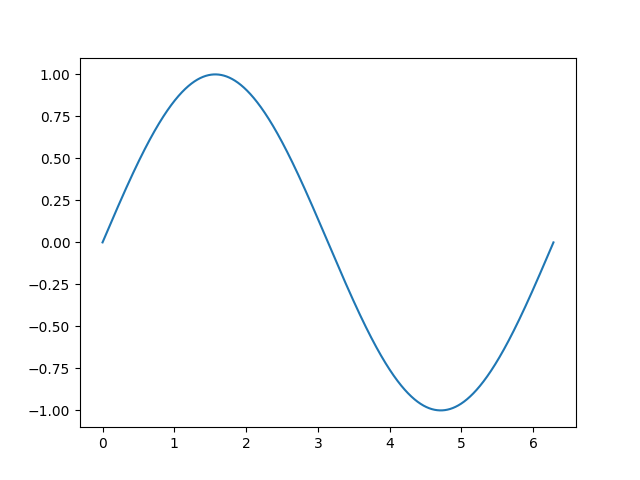

In [16]:
a = np.linspace(0, 2*np.pi, num=4000)
b = np.sin(a)

fig, ax = plt.subplots(1, 1)
ax.plot(a,b)
plt.show()

In [17]:
%prun calcPZ(df["e1tof"]/time_ns_SI, -1, 1, (57.)/length_mm_SI, (117.+57.)/length_mm_SI, -57.4/eField_Vcm_SI)

0
 

         25966 function calls (25380 primitive calls) in 3.212 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       40    1.149    0.029    1.149    0.029 {built-in method _operator.pow}
       36    0.543    0.015    0.543    0.015 roperator.py:18(rmul)
        1    0.395    0.395    3.196    3.196 2589938508.py:1(calcPZ)
       24    0.392    0.016    0.392    0.016 {built-in method _operator.add}
       16    0.246    0.015    0.246    0.015 {built-in method _operator.mul}
       13    0.211    0.016    0.211    0.016 {built-in method _operator.sub}
      4/3    0.140    0.035    0.172    0.057 arraylike.py:253(array_ufunc)
        4    0.064    0.016    0.064    0.016 {built-in method _operator.truediv}
        1    0.026    0.026    0.026    0.026 roperator.py:10(radd)
        1    0.008    0.008    3.212    3.212 <string>:1(<module>)
        1    0.006    0.006    0.006    0.006 arraylike.py:465(_assign_where)
     

In [18]:
%prun calcMomElec(df, specLength=117.+57., specAcc=57., specEz=-57.4, gyrationPeriode=bField_Gauss_to_ns(6.0), shift=(-0.96,1.84,-0.5), stretch=(1.,1.,1.29), rotate=60, shiftThenRotate=False)

0
 

         1329 function calls (1269 primitive calls) in 4.113 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    3.159    3.159    3.161    3.161 2589938508.py:1(calcPZ)
        1    0.843    0.843    4.101    4.101 1175041830.py:1(calcMomElec)
       10    0.064    0.006    0.064    0.006 {method 'copy' of 'numpy.ndarray' objects}
        3    0.019    0.006    0.019    0.006 {built-in method numpy.array}
        1    0.012    0.012    4.113    4.113 <string>:1(<module>)
       10    0.011    0.001    0.013    0.001 frame.py:4249(_iset_item_mgr)
        1    0.002    0.002    0.002    0.002 {method 'reduce' of 'numpy.ufunc' objects}
       10    0.001    0.000    0.001    0.000 {method 'clear' of 'dict' objects}
        1    0.000    0.000    0.000    0.000 socket.py:621(send)
       10    0.000    0.000    0.077    0.008 frame.py:4065(__setitem__)
       10    0.000    0.000    0.064    0.006 construction.py:518(

In [19]:
from __future__ import annotations

class CONSTANTS:
    MM_SI_TO_AU       =  5.291_772_109_03e-8
    VCM_SI_TO_AU      =  5.142_206_747_63e9
    NS_SI_TO_AU       =  2.418_884_326_585_7e-8
    EV_SI_TO_AU       = 27.211_386_245_988
    GAUSS_TO_NS = lambda x: 1e9*(2*np.pi*9.1093837e-31)/(1.60217733e-19*x*1e-4)

class Spectrometer:
    from typing import Optional
    
    def __init__(self, lengths:        Optional[List[float|int]] = None, \
                       electicFields:  Optional[List[float|int]] = None, \
                       gyrationPeriod: Optional[float|int]                    = None, \
                       magneticField:  Optional[float|int]                    = None, \
                ) -> None:
        """
        lengths:        array of spectrometer lengths       in mm
        electicFields:  array of spectrometer electicFields in V/cm
        gyrationPeriod: float of magneticField gyration periode in ns
        magneticField:  float of magneticField in Gauss (set if gyrationPeriod is not set)
        """
        self.lengths        = lengths        if lengths        is not None else list()
        self.electricFields = electicFields  if electicFields  is not None else list()
        self._gyrationPeriod = gyrationPeriod if gyrationPeriod is not None else \
                               CONSTANTS.GAUSS_TO_NS(magneticField) if magneticField is not None else None
    
    def __len__(self):
        return len(self.lengths)
    
    def __iter__(self):
        self.iterIndex = 0
        return self
    
    def __next__(self):
        if self.iterIndex < len(self):
            val = (self.lengths[self.iterIndex], self.electricFields[self.iterIndex])
            self.iterIndex += 1
            return val
        else:
            raise StopIteration
    
    def __getitem__(self, index):
        if not isinstance(index, int):
            raise TypeError
        if index < -len(self) or index >= len(self):
            raise IndexError
        
        return (self.lengths[index], self.electricFields[index])

    @property
    def gyrationPeriod(self) -> float|int|None:
        if self._gyrationPeriod is None:
                return None
        return self._gyrationPeriod
    @gyrationPeriod.setter
    def gyrationPeriod(self, gyrationPeriode: float|int|None):
        self._gyrationPeriod = gyrationPeriod
    @property
    def magneticField(self) -> float|int|None:
        if self._gyrationPeriod is None:
            return None
        return CONSTANTS.GAUSS_TO_NS(self._gyrationPeriod)
    @magneticField.setter
    def magneticField(self, magneticField: float|int|None):
        if magneticField is None:
            self._gyrationPeriod = None
        else:
            self._gyrationPeriod = CONSTANTS.GAUSS_TO_NS(magneticField)

    def addRegion(self, length: float|int, electricField: float|int):
        """
        Append a field region to the spectrometer.
        length:        lenght of region in mm
        electricField: field strength   in V/cm
        """
        if electricField<0:
            print("\033[93mDeaccelation Field region added.\033[0m")
        self.lengths.append(length)
        self.electricFields.append(electricField)
    
class CalcSettings:
    def __init__(self, shiftX:    float = 0.   , shiftY:    float = 0.,    shiftTOF:     float = 0.,    \
                       stretchX:  float = 1.   , stretchY:  float = 1.,    stretchTotal: float = 1.,    \
                       rotateDeg: float = 0.   , mirrorX:   bool  = False, mirrorY:      bool  = False, \
                       shiftPX:   float = 0.   , shiftPY:   float = 0.,    shiftPZ:      float = 0.,    \
                       stretchPX: float = 1.   , stretchPY: float = 1.,    stretchPZ:    float = 1., stretchPTotal: float = 1., \
                       mirrorPX:  bool  = False, mirrorPY:  bool  = False, shiftThenRotate: bool=True   \
                ) -> None:
                
        self.shiftX               = shiftX          # mm
        self.shiftY               = shiftY          # mm
        self.shiftTOF=self.shiftT = shiftTOF        # ns
        self.stretchX             = stretchX        # 1
        self.stretchY             = stretchY        # 1
        self.stretchTotal         = stretchTotal    # 1
        self.rotateDeg            = rotateDeg       # deg
        self.mirrorX              = mirrorX         # bool
        self.mirrorY              = mirrorY         # bool
        self.shiftPX              = shiftPX         # a.u.
        self.shiftPY              = shiftPY         # a.u.
        self.shiftPZ              = shiftPZ         # a.u.
        self.stretchPX            = stretchPX       # 1
        self.stretchPY            = stretchPY       # 1
        self.stretchPZ            = stretchPZ       # 1
        self.stretchPTotal        = stretchPTotal   # 1
        self.mirrorPX             = mirrorPX        # bool
        self.mirrorPY             = mirrorPY        # bool
        self.shiftThenRotate      = shiftThenRotate # bool

class Particle:
    import numpy as np
    from typing import Optional
    import warnings
    
    def __init__(self, x:            Optional[np.ndarray]           = None, \
                       y:            Optional[np.ndarray]           = None, \
                       tof:          Optional[np.ndarray]           = None, \
                       m:            Optional[np.ndarray|int|float] = None, \
                       q:            Optional[np.ndarray|int|float] = None, \
                       px:           Optional[np.ndarray]           = None, \
                       py:           Optional[np.ndarray]           = None, \
                       pz:           Optional[np.ndarray]           = None, \
                       p:            Optional[np.ndarray]           = None, \
                       energy:       Optional[np.ndarray]           = None, \
                       spectrometer: Optional[Spectrometer]         = None, \
                       calcSettings: Optional[CalcSettings]         = None, \
                       isIonSide: bool                              = True, \
                       dtype:  np.typing.DTypeLike                  = np.double, \
                       ctype:  np.typing.DTypeLike                  = np.cdouble, \
                ) -> None:
        self._x      = None if x      is None else np.array(x, dtype=dtype)      # mm
        self._y      = None if y      is None else np.array(y, dtype=dtype)      # mm
        self._tof    = None if tof    is None else np.array(tof, dtype=dtype)    # ns
        self._q      = None if q      is None else np.array(q, dtype=dtype)      # a.u.
        self._m      = None if m      is None else np.array(m, dtype=dtype)      # a.u.
                                                                    # 
        self._px     = None if px     is None else np.array(px, dtype=dtype)     # a.u.
        self._py     = None if py     is None else np.array(py, dtype=dtype)     # a.u.
        self._pz     = None if pz     is None else np.array(pz, dtype=dtype)     # a.u.
        self._p      = None if p      is None else np.array(p, dtype=dtype)      # a.u.
        self._energy = None if energy is None else np.array(energy, dtype=dtype) # eV
        
        self._spectrometer          = spectrometer
        self._recalculateMomentum   = True
        self._electricFieldPolarity = 1 if isIonSide else -1
        self._mirrorYElectron       = 1 if isIonSide else -1
        self._calcSettings          = calcSettings
        
        self._dtype = dtype
        self._ctype = ctype
    
    def setUpdateMomentum(self):
        self._recalculateMomentum = True
    
    @property
    def x(self) -> np.ndarray:
        """
        x-position of particle in mm
        """
        if self._x is None:
            raise ValueError("The variable 'x' is not yet set!")
        return self._x
    @x.setter
    def x(self, x: np.ndarray) -> None:
        self._x = np.array(x, dtype=self._dtype)
        self._recalculateMomentum = True
    
    @property
    def y(self) -> np.ndarray:
        """
        y-position of particle in mm
        """
        if self._y is None:
            raise ValueError("The variable 'y' is not yet set!")
        return self._y
    @y.setter
    def y(self, y: np.ndarray) -> None:
        self._y = np.array(y, dtype=self._dtype)
        self._recalculateMomentum = True
    
    @property
    def tof(self) -> np.ndarray:
        """
        tof of particle in ns
        """
        if self._tof is None:
            raise ValueError("The variable 'tof' is not tofet set!")
        return self._tof
    @tof.setter
    def tof(self, tof: np.ndarray) -> None:
        self._tof = np.array(tof, dtype=self._dtype)
        self._recalculateMomentum = True
    
    @property
    def m(self) -> np.ndarray:
        """
        mass of particle in a.u.
        """
        if self._m is None:
            raise ValueError("The variable 'm' is not yet set!")
        return self._m
    @m.setter
    def m(self, m: np.ndarray) -> None:
        self._m = np.array(m, dtype=self._dtype)
        self._recalculateMomentum = True
    
    @property
    def q(self) -> np.ndarray:
        """
        electric charge of particle in a.u.
        """
        if self._q is None:
            raise ValueError("The variable 'q' is not yet set!")
        return self._q
    @q.setter
    def q(self, q: np.ndarray) -> None:
        self._q = np.array(q, dtype=self._dtype)
        self._recalculateMomentum = True
    
    def px(self) -> np.ndarray:
        """
        x-momentum of particle in a.u.
        """
        if self._px is None or self._recalculateMomentum:
            self.calcMomentum()
        return self._px
    def py(self) -> np.ndarray:
        """
        y-momentum of particle in a.u.
        """
        if self._py is None or self._recalculateMomentum:
            self.calcMomentum()
        return self._py
    def pz(self) -> np.ndarray:
        """
        z-momentum of particle in a.u.
        """
        if self._pz is None or self._recalculateMomentum:
            self.calcMomentum()
        return self._pz
    def p(self) -> np.ndarray:
        """
        absolute momentum of particle in a.u.
        """
        if self._p is None or self._recalculateMomentum:
            self.calcMomentum()
        return self._p
    def energy(self) -> np.ndarray:
        """
        kinetic energy of particle in eV
        """
        if self._energy is None or self._recalculateMomentum:
            self.calcMomentum()
        return self._energy
    
    @property
    def spectrometer(self) -> np.ndarray:
        if self._spectrometer is None:
            raise ValueError("The variable 'spectrometer' is not yet set!")
        return self._spectrometer
    @spectrometer.setter
    def spectrometer(self, spectrometer: Spectrometer) -> None:
        self._spectrometer = spectrometer
        self._recalculateMomentum = True
    @property
    def calcSettings(self) -> np.ndarray:
        if self._calcSettings is None:
            raise ValueError("The variable 'calcSettings' is not yet set!")
        return self._calcSettings
    @calcSettings.setter
    def calcSettings(self, calcSettings: calcSettings) -> None:
        self._calcSettings = calcSettings
        self._recalculateMomentum = True
    
    def calcMomentum(self, spectrometer: Optional[Spectrometer] = None, \
                           calcSettings: Optional[CalcSettings] = None  \
                    ) -> None:
        if spectrometer is None:
            spectrometer = self.spectrometer
        if calcSettings is None:
            calcSettings = self.calcSettings

        if spectrometer.gyrationPeriod is not None and spectrometer.gyrationPeriod != 0:
            omega = 2*np.pi*CONSTANTS.NS_SI_TO_AU / spectrometer.gyrationPeriod
        rotationAngle = np.deg2rad(calcSettings.rotateDeg)
        
        x = self.x   / CONSTANTS.MM_SI_TO_AU
        y = self.y   / CONSTANTS.MM_SI_TO_AU
        t = self.tof / CONSTANTS.NS_SI_TO_AU
        
        # Mirror detector
        if calcSettings.mirrorX:
            x *= -1
        if calcSettings.mirrorY:
            y *= -1
        
        # Shift and rotate detector
        if calcSettings.shiftThenRotate:
            x += calcSettings.shiftX / CONSTANTS.MM_SI_TO_AU
            y += calcSettings.shiftY / CONSTANTS.MM_SI_TO_AU
            t += calcSettings.shiftT / CONSTANTS.NS_SI_TO_AU
            
            x, y = x*np.cos(rotationAngle)-y*np.sin(rotationAngle), x*np.sin(rotationAngle)+y*np.cos(rotationAngle)
        
        else:
            x, y = x*np.cos(rotationAngle)-y*np.sin(rotationAngle), x*np.sin(rotationAngle)+y*np.cos(rotationAngle)
            
            x += calcSettings.shiftX / CONSTANTS.MM_SI_TO_AU
            y += calcSettings.shiftY / CONSTANTS.MM_SI_TO_AU
            t += calcSettings.shiftT / CONSTANTS.NS_SI_TO_AU
        
        
        # Stretch detector
        x *= calcSettings.stretchX * calcSettings.stretchTotal
        y *= calcSettings.stretchY * calcSettings.stretchTotal
        
        
        # Calculate momentum
        if spectrometer.gyrationPeriod is not None and spectrometer.gyrationPeriod != 0:
            px = omega * 0.5 * (x / np.tan(omega * t * 0.5) - y)
            py = omega * 0.5 * (y / np.tan(omega * t * 0.5) + x) * self._mirrorYElectron
        else:
            px = self.m * x / t
            py = self.m * y / t
        pz = self._calcZMomentum(tof=t, spectrometer=spectrometer, calcSettings=calcSettings)
        
        # Shift momentum
        px += calcSettings.shiftPX
        py += calcSettings.shiftPY
        pz += calcSettings.shiftPZ

        # Stretch momentum
        px *= calcSettings.stretchPX * calcSettings.stretchPTotal
        py *= calcSettings.stretchPY * calcSettings.stretchPTotal
        pz *= calcSettings.stretchPZ * calcSettings.stretchPTotal
        
        # Calculate derived values
        p2     = px**2 + py**2 + pz**2
        p      = np.sqrt(p2)
        energy = CONSTANTS.EV_SI_TO_AU * p2 / (2*self.m)
        
        # Transfer values
        self._px     = px
        self._py     = py
        self._pz     = pz
        self._p      = p
        self._energy = energy

        self._recalculateMomentum = False
    
    def _calcZMomentum(self, tof: np.ndarray,                   \
                             spectrometer: Spectrometer = None, \
                             calcSettings: CalcSettings = None, \
                       ) -> None:
        if len(spectrometer) == 0:
            raise Exception("Spectrometer not sufficiently defined")
        if len(spectrometer) == 1:
            # Linear case
            length, field = spectrometer[0]
            return length * self.m / tof - 0.5 * (field * self._electricFieldPolarity) * self.q * tof
        if len(spectrometer) == 2:
            if spectrometer[1][1] == 0.:
                s_B, a = spectrometer[0] # Length and field of acceleration region
                a     *= self._electricFieldPolarity
                s_D, _ = spectrometer[1] # Length drift region
                t      = np.array(tof, dtype=self._ctype)
                m      = self.m
                s      = s_B + s_D       # Total length of spectrometer
                q      = self.q
                
                # calculate velocity
                v = (-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + np.sqrt((-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**2 + 4*(24*a*q*t**2*s_B - (a*q*t**2 - 2*s)**2)**3) + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**(1./3.)/(6*2**(1./3.)*t) - (24*a*q*t**2*s_B - (a*q*t**2 - 2*s)**2)/(3*2**(2./3.)*t*(-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + np.sqrt((-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**2 + 4*(24*a*q*t**2*s_B - (a*q*t**2 - 2*s)**2)**3) + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**(1./3.)) - (a*q*t**2 - 2*s)/(6*t)
                print(np.sum(np.imag(v)!=0), v)
                test = (-2*a**3*q**3*t**6 - 144*a**2*q**2*t**4*s_B + 12*a**2*q**2*s*t**4 + 108*a*q*t**2*s_B**2 + 72*a*q*s*t**2*s_B + 84*a*q*s**2*t**2 + 16*s**3)**2 + 4*(24*a*q*t**2*s_B - (a*q*t**2 - 2*s)**2)**3
                print(np.min(test), test)
                vReal = np.array(np.real(v), dtype=self._dtype)
                vReal[np.imag(v)!=0] = None
                return m*vReal
            else:
                raise NotImplementedError("z-Momentum calculation not implemented for 2-regions spectrometer, when the field of the second region is not zero.")
        if len(spectrometer) >= 3:
            raise NotImplementedError("z-Momentum calculation not implemented for spectrometers with three or more regions.")

class Electron(Particle):
    from typing import Optional
    def __init__(self, x:            Optional[np.ndarray]           = None, \
                       y:            Optional[np.ndarray]           = None, \
                       tof:          Optional[np.ndarray]           = None, \
                       px:           Optional[np.ndarray]           = None, \
                       py:           Optional[np.ndarray]           = None, \
                       pz:           Optional[np.ndarray]           = None, \
                       p:            Optional[np.ndarray]           = None, \
                       energy:       Optional[np.ndarray]           = None, \
                       spectrometer: Optional[Spectrometer]         = None, \
                       calcSettings: Optional[CalcSettings]         = None, \
                       dtype:  np.typing.DTypeLike                  = np.double, \
                       ctype:  np.typing.DTypeLike                  = np.cdouble, \
                ) -> None:
        super().__init__(x=x, y=y, tof=tof, m=1, q=-1, px=px, py=py, pz=py, \
                         p=p, energy=energy, spectrometer=spectrometer,     \
                         calcSettings=calcSettings, isIonSide=False,        \
                         dtype=dtype, ctype=ctype)
        
class Ion(Particle):
    from typing import Optional
    def __init__(self, x:            Optional[np.ndarray]           = None, \
                       y:            Optional[np.ndarray]           = None, \
                       tof:          Optional[np.ndarray]           = None, \
                       m:            Optional[np.ndarray|int|float] = None, \
                       q:            Optional[np.ndarray|int|float] = None, \
                       px:           Optional[np.ndarray]           = None, \
                       py:           Optional[np.ndarray]           = None, \
                       pz:           Optional[np.ndarray]           = None, \
                       p:            Optional[np.ndarray]           = None, \
                       energy:       Optional[np.ndarray]           = None, \
                       spectrometer: Optional[Spectrometer]         = None, \
                       calcSettings: Optional[CalcSettings]         = None, \
                       isIonSide:    Optional[bool]                 = True, \
                       dtype:  np.typing.DTypeLike                  = np.double, \
                       ctype:  np.typing.DTypeLike                  = np.cdouble, \
                ) -> None:
        super().__init__(x=x, y=y, tof=tof, m=m, q=q, px=px, py=py, pz=py, \
                         p=p, energy=energy, spectrometer=spectrometer,    \
                         calcSettings=calcSettings, isIonSide=isIonSide,   \
                         dtype=dtype, ctype=ctype)
               
class ParticleList:
    from typing import Optional
    def __init__(self, particles: Optional[list[Particle]] = None):
        self.particles = list() if particles is None else particles
    
    def __len__(self) -> int:
        return len(self.particles)
    
    def __iter__(self) -> ParticleList:
        self.iterIndex = 0
        return self
    
    def __next__(self) -> Particle:
        if self.iterIndex < len(self):
            val = self.particles[self.iterIndex]
            self.iterIndex += 1
            return val
        else:
            raise StopIteration
    
    def __getitem__(self, index) -> Particle:
        return self.particles[index]
    
    
    def __add__(self, other: ParticleList|Particle) -> ParticleList:
        """
        Returns a shallow copy of the particle list, with other appended.
        """
        copy = self.particle.copy()
        if   isinstance(other, ParticleList):
            copy.extend(other)
            return copy
        elif isinstance(other, Particle):
            copy.append(other)
            return copy
        else:
            raise NotImplementedError
    
    def __iadd__(self, other: ParticleList|Particle) -> ParticleList:
        """
        Appends other to the list of particles.
        """
        if   isinstance(other, ParticleList):
            self.particles.extend(other)
            return self
        elif isinstance(other, Particle):
            self.particles.append(other)
            return self
        else:
            raise NotImplementedError
 

In [20]:
class Reaction:
    from typing import Optional
    IS_ION = 1
    IS_ELECTRON = 2

    def __init__(self, ionSpectrometer: Optional[Spectrometer] = None, electronSpectrometer: Optional[Spectrometer] = None, \
                       ionCalcSettings: Optional[CalcSettings] = None, electronCalcSettings: Optional[CalcSettings] = None):
        self._ionsArr   = ParticleList()
        self._elecArr   = ParticleList()
        self._ionsSpec  = ionSpectrometer
        self._elecSpec  = electronSpectrometer
        self._ionsCalcSettings = ionCalcSettings
        self._elecCalcSettings = electronCalcSettings
    
    @property
    def numIons(self):
        return len(self._ionsArr)
    
    @property
    def numElec(self):
        return len(self._elecArr)
    
    @property
    def ionsArr(self):
        return self._ionsArr
    
    @property
    def i(self):
        return self._ionsArr
    
    @property
    def r(self):
        return self._ionsArr
    
    @property
    def elecArr(self):
        return self._elecArr
    
    @property
    def e(self):
        return self._elecArr
    
    def add_ion(self, x: np.ndarray, y: np.ndarray, tof: np.ndarray, \
                      m: np.ndarray|float|int, q: np.ndarray|float|int, \
                      spectrometer: Optional[Spectrometer] = None, \
                      calcSettings: Optional[CalcSettings] = None, *,\
                      dtype:  np.typing.DTypeLike           = np.double, \
                      ctype:  np.typing.DTypeLike           = np.cdouble) -> None:
        if spectrometer is None and self._ionsSpec is not None:
            spectrometer = self._ionsSpec
        if calcSettings is None:
            if self._ionsCalcSettings is not None:
                calcSettings = self._ionsCalcSettings
            else:
                calcSettings = CalcSettings()
        self._ionsArr += Ion(x=x, y=y, tof=tof, m=m, q=q, spectrometer=spectrometer, calcSettings=calcSettings, dtype=dtype, ctype=ctype)

    def add_elec(self, x: np.ndarray, y: np.ndarray, tof: np.ndarray, \
                       spectrometer: Optional[Spectrometer] = None, \
                       calcSettings: Optional[CalcSettings] = None, *,\
                       dtype:  np.typing.DTypeLike          = np.double, \
                       ctype:  np.typing.DTypeLike          = np.cdouble) -> None:
        if spectrometer is None and self._elecSpec is not None:
            spectrometer = self._elecSpec
        if calcSettings is None:
            if self._elecCalcSettings is not None:
                calcSettings = self._elecCalcSettings
            else:
                calcSettings = CalcSettings()
        self._elecArr += Electron(x=x, y=y, tof=tof, spectrometer=spectrometer, calcSettings=calcSettings, dtype=dtype, ctype=ctype)

    def setIonSpectrometer(self, spectrometer: Spectrometer, applyToAll: bool = True):
        self._ionsSpec = spectrometer
        if applyToAll:
            for ion in self._ionsArr:
                ion.spectrometer = spectrometer

    def setElectronSpectrometer(self, spectrometer: Spectrometer, applyToAll: bool = True):
        self._elecSpec = spectrometer
        if applyToAll:
            for electron in self._elecArr:
                electron.spectrometer = spectrometer

In [21]:
specElec = Spectrometer()
specElec.magneticField = None
specElec.addRegion(120, 42.78)
specElec.addRegion(57, 0)

reaction = Reaction(electronSpectrometer=specElec)
reaction.add_elec(df["e1x"], df["e1y"], df["e1tof"], dtype=np.longdouble, ctype=np.clongdouble)

reaction.add_ion(df["r1x"], df["r1y"], df["r1tof"], m=12, q=1)

print(reaction)

In [22]:
print([e for e in reaction.e])

In [23]:
reaction.e[0].px()

6030499 [1.90734863e-06-120.92808723j 1.90734863e-06 -42.94232368j
 1.90734863e-06 -80.37793255j ... 9.53674316e-07-118.41516304j
 9.53674316e-07 -52.87759399j 2.86102295e-06 -69.22538376j]
(-4.4794894843556084e+103+0j) [7.83910660e+102+0.j 2.23974474e+102+0.j 4.47948948e+102+0.j ...
 3.91955330e+102+0.j 2.23974474e+102+0.j 8.95897897e+102+0.j]


array([ 0.07160875,  0.46089209, -0.19488662, ...,  0.22493568,
        0.12839518,  0.31732476])

In [24]:
reaction.e[0].px()

array([ 0.07160875,  0.46089209, -0.19488662, ...,  0.22493568,
        0.12839518,  0.31732476])

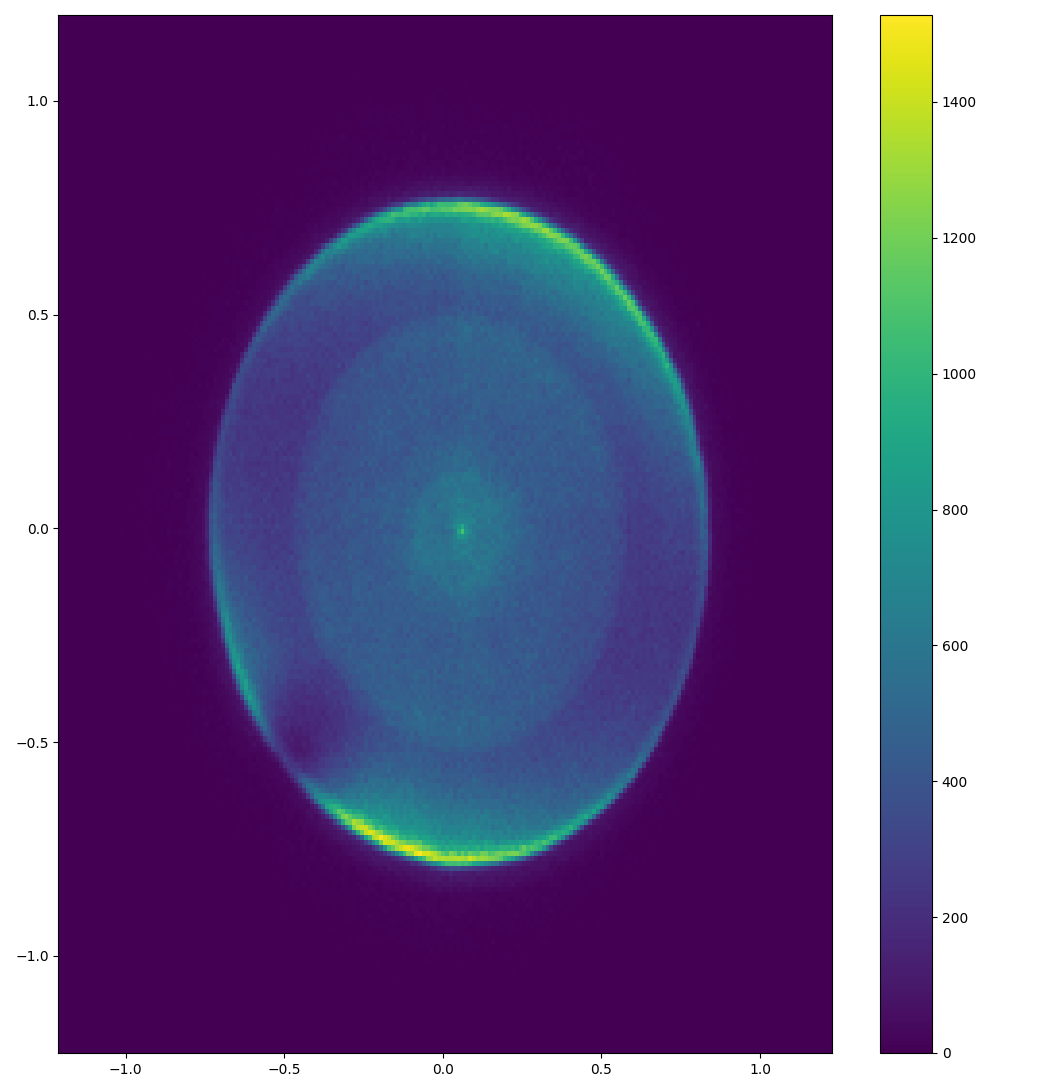

In [31]:
plt.gcf().clear()
plt.hist2d(reaction.e[0].px(), reaction.e[0].py(), bins=200)
plt.colorbar()
plt.tight_layout()
plt.show()

In [ ]:
df["r1x"]

In [ ]:
%timeit -r5 -n10 reaction.e[0].calcMomentum()

In [ ]:
from line_profiler import LineProfiler
lp = LineProfiler()
lp.add_function(reaction.e[0].calcMomentum)
lp.add_function(reaction.e[0]._calcZMomentum)
lp.run("reaction.e[0].calcMomentum()")
lp.print_stats()